In [3]:
import numpy as np
import pandas as pd

In [4]:
train = pd.read_excel('dataset_dixy_1.xlsx')

In [5]:
train.head()

,Id,work_time,rab_kol_dn,lat,long_,alco,TC_R100,TC_R200,TC_R300,TC_R500,...,age_m60,poi_cnt_R100,poi_cnt_R200,poi_cnt_R300,poi_cnt_R500,poi_cnt_R1000,poi_cnt_R300_500,poi_cnt_R500_1000,arenda_R1000,revenue
0,50881,24,2347,55.464536,37.552112,1,1,1,2,2,...,1701,38,68,100,180,482,80,302,0,495814.6757
1,90260,14,188,56.310215,37.934300,0,0,0,0,0,...,238,0,0,0,0,0,0,0,0,268209.0854
2,77574,15,195,55.860746,37.372431,0,0,0,0,0,...,891,0,1,5,7,78,2,71,0,252603.3630
3,47229,13,198,59.641823,30.428861,0,0,0,0,0,...,403,2,6,7,8,9,1,1,0,299161.2951
4,90259,13,200,55.389600,38.201000,0,0,0,0,0,...,0,0,1,8,9,12,1,3,0,192371.9766


Приведение типов данных

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2472 entries, 0 to 2471
Columns: 370 entries, Id to revenue
dtypes: float64(6), int64(364)
memory usage: 7.0 MB


In [7]:
train['Id'].dtype

dtype('int64')

In [8]:
train['Id'] = train['Id'].astype(str)
train['Id'].dtype

dtype('O')

Обзор количественных переменных

In [9]:
train_num_features = train.select_dtypes(include=['float64', 'int64'])
train_num_features.head()

,work_time,rab_kol_dn,lat,long_,alco,TC_R100,TC_R200,TC_R300,TC_R500,TC_R1000,...,age_m60,poi_cnt_R100,poi_cnt_R200,poi_cnt_R300,poi_cnt_R500,poi_cnt_R1000,poi_cnt_R300_500,poi_cnt_R500_1000,arenda_R1000,revenue
0,24,2347,55.464536,37.552112,1,1,1,2,2,3,...,1701,38,68,100,180,482,80,302,0,495814.6757
1,14,188,56.310215,37.934300,0,0,0,0,0,0,...,238,0,0,0,0,0,0,0,0,268209.0854
2,15,195,55.860746,37.372431,0,0,0,0,0,0,...,891,0,1,5,7,78,2,71,0,252603.3630
3,13,198,59.641823,30.428861,0,0,0,0,0,0,...,403,2,6,7,8,9,1,1,0,299161.2951
4,13,200,55.389600,38.201000,0,0,0,0,0,0,...,0,0,1,8,9,12,1,3,0,192371.9766


In [8]:
train.describe()

,work_time,rab_kol_dn,lat,long_,alco,TC_R100,TC_R200,TC_R300,TC_R500,TC_R1000,...,age_m60,poi_cnt_R100,poi_cnt_R200,poi_cnt_R300,poi_cnt_R500,poi_cnt_R1000,poi_cnt_R300_500,poi_cnt_R500_1000,arenda_R1000,revenue
count,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.00000,...,2472.000000,2472.000000,2472.00000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2472.000000,2.472000e+03
mean,16.509304,2832.667476,56.784837,37.206023,0.934061,0.126618,0.264159,0.427589,0.856392,2.50445,...,2732.512540,17.156553,45.15534,84.457929,200.480178,662.804612,116.022249,462.324434,277.268204,3.017728e+05
std,4.260241,1233.699610,2.546036,5.874059,0.248225,0.397976,0.693528,0.961635,1.594966,3.40863,...,2882.970472,23.350291,61.61027,116.968230,287.104936,962.748724,183.575743,705.247784,417.585910,1.459611e+05
min,11.000000,188.000000,52.224958,27.612998,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.960381e+04
25%,14.000000,1984.750000,55.510853,34.592380,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,323.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.993121e+05
50%,15.000000,2622.000000,55.816460,37.548737,1.000000,0.000000,0.000000,0.000000,0.000000,1.00000,...,1909.000000,10.000000,26.00000,50.000000,112.000000,326.500000,51.500000,187.000000,0.000000,2.636795e+05
75%,15.000000,3171.000000,57.647845,38.097893,1.000000,0.000000,0.000000,1.000000,1.000000,4.00000,...,3954.000000,24.000000,62.25000,114.000000,274.000000,962.500000,154.000000,669.000000,550.000000,3.665925e+05
max,24.000000,7377.000000,69.403802,65.600281,1.000000,4.000000,7.000000,10.000000,14.000000,29.00000,...,16038.000000,243.000000,588.00000,1021.000000,2470.000000,7518.000000,1827.000000,5458.000000,2901.000000,1.167637e+06


Обзор номинативных переменных

In [10]:
train_obj_features = train.select_dtypes(include='object')
train_obj_features.head()

,Id
0,50881
1,90260
2,77574
3,47229
4,90259


Обработка пропусков

In [11]:
len(train) - train.count()

Id                   0
work_time            0
rab_kol_dn           0
lat                  0
long_                0
                    ..
poi_cnt_R1000        0
poi_cnt_R300_500     0
poi_cnt_R500_1000    0
arenda_R1000         0
revenue              0
Length: 370, dtype: int64

In [12]:
print(len(train))
print(train.count())

2472
Id                   2472
work_time            2472
rab_kol_dn           2472
lat                  2472
long_                2472
                     ... 
poi_cnt_R1000        2472
poi_cnt_R300_500     2472
poi_cnt_R500_1000    2472
arenda_R1000         2472
revenue              2472
Length: 370, dtype: int64


Визуализация и анализ данных.

In [13]:
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
matplotlib.rcParams.update({'font.size': 14})

In [15]:
train.dtypes

Id                    object
work_time              int64
rab_kol_dn             int64
lat                  float64
long_                float64
                      ...   
poi_cnt_R1000          int64
poi_cnt_R300_500       int64
poi_cnt_R500_1000      int64
arenda_R1000           int64
revenue              float64
Length: 370, dtype: object

Анализ целевой переменной

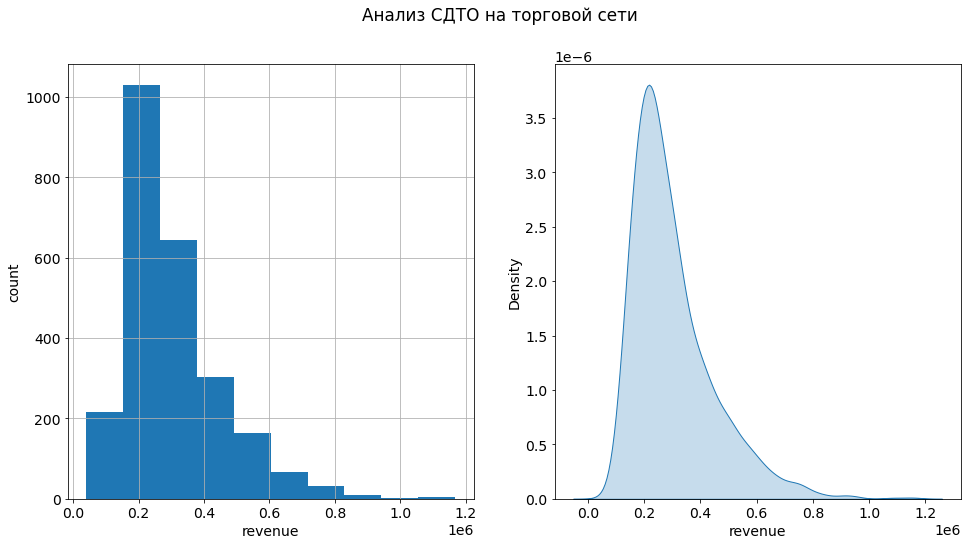

In [16]:
plt.figure(figsize = (16, 8))

plt.subplot(121)
train['revenue'].hist()
plt.ylabel('count')
plt.xlabel('revenue')

plt.subplot(122)
sns.kdeplot(train['revenue'], shade=True, legend=False)
plt.xlabel('revenue')

plt.suptitle('Анализ СДТО на торговой сети')
plt.show()